In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Load dataset
df = pd.read_csv('bank.csv')

# Display the first few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [11]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values (if any) - here we drop rows with missing values
df = df.dropna()

# Convert categorical columns to numerical using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Check the first few rows after transformation
df.head()


Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
date         0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,date
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,2023-05-05
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,2023-05-05
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,2023-05-05
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,2023-05-05
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,2023-05-05


                age           job       marital     education       default  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948      4.487905      1.199337      1.285164      0.015051   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       49.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   
std       11.913369      3.225132      0.625552      0.749478      0.121761   

            balance       housing          loan       contact           day  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean    1528.538524      0.473123      0.130801      0.489697     15.658036   
min    -6847.000000      0.000000      0.000000    

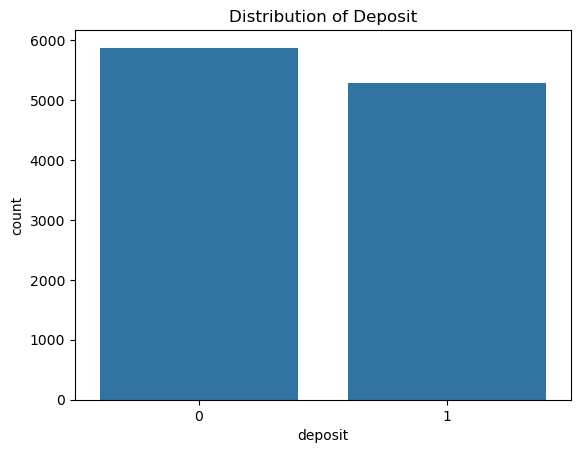

deposit
0    52.616019
1    47.383981
Name: proportion, dtype: float64


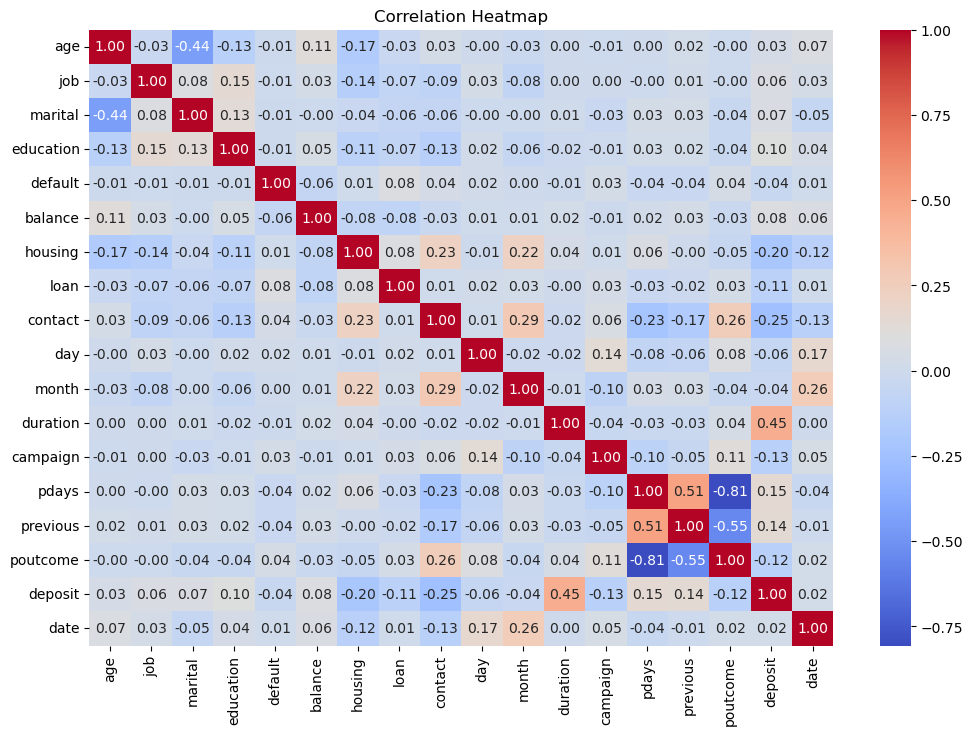

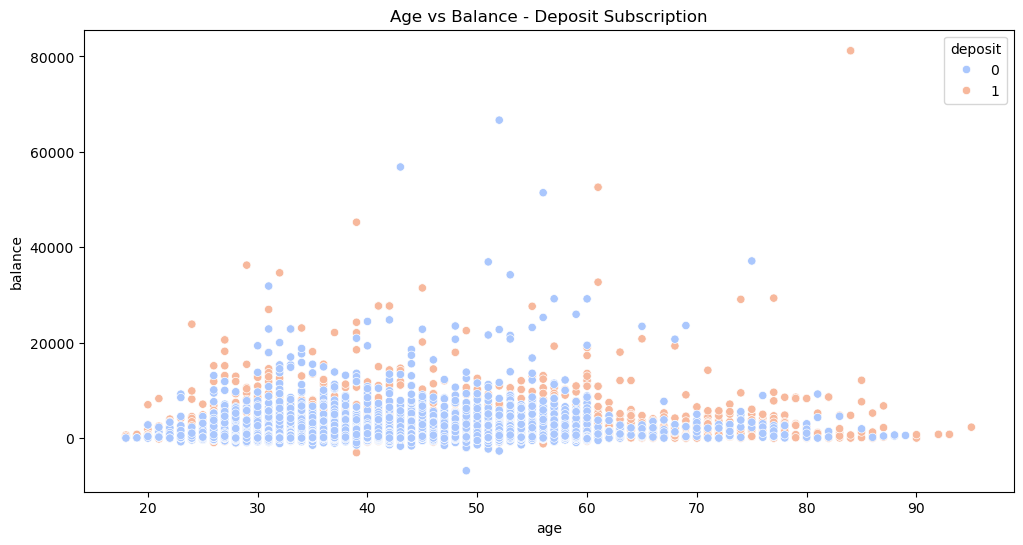

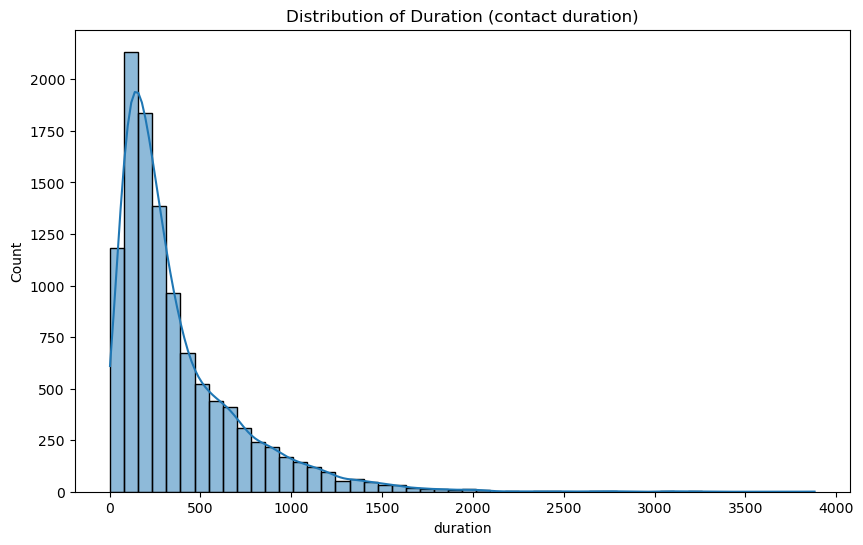

In [13]:
# Basic statistical summary
print(df.describe())

# Visualizing the distribution of the target variable ('deposit')
sns.countplot(x='deposit', data=df)
plt.title('Distribution of Deposit')
plt.show()

# Proportion of customers who subscribed to the bank's services
print(df['deposit'].value_counts(normalize=True) * 100)

# Correlation heatmap to see the relationship between numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualize the relationship between age and balance for subscribed vs not subscribed customers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='balance', hue='deposit', data=df, palette='coolwarm')
plt.title('Age vs Balance - Deposit Subscription')
plt.show()

# Visualizing distribution of 'duration' variable (how long the customer was contacted)
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True, bins=50)
plt.title('Distribution of Duration (contact duration)')
plt.show()


In [17]:
# Extract year, month, and day from 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the 'date' column if no longer needed
df = df.drop('date', axis=1)


In [19]:
# Example of one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are defined as your features and target
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']  # Target

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
print(f"Model accuracy: {model.score(X_test, y_test)}")


Model accuracy: 0.8360949395432155


In [23]:
# Let's calculate feature importance for predictive modeling
X = df.drop('deposit', axis=1)
y = df['deposit']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple Random Forest classifier to assess feature importance
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display top important features
print(feature_importances.head())

          importance
duration    0.366545
balance     0.087231
age         0.083181
month       0.082950
day         0.077630


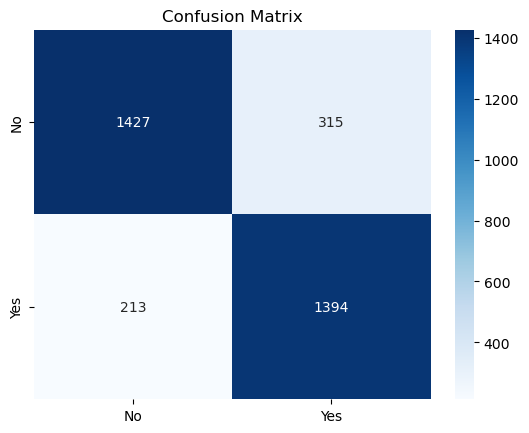

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1742
           1       0.82      0.87      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



In [25]:
# Predict on test data
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [27]:
# Based on feature importance and analysis, provide some conclusions and recommendations:
important_features = feature_importances.head(5).index.tolist()
print(f"The most important factors affecting customer subscription are: {', '.join(important_features)}")

# Recommendations for improving future marketing campaigns:
recommendations = """
1. Focus on customers with higher balances as they are more likely to subscribe.
2. Target customers who have been contacted for longer durations.
3. Further explore specific job categories, as certain jobs may be more responsive to campaigns.
4. Improve campaign targeting by understanding customer demographics better.
"""

print("Recommendations for the next marketing campaign:\n", recommendations)


The most important factors affecting customer subscription are: duration, balance, age, month, day
Recommendations for the next marketing campaign:
 
1. Focus on customers with higher balances as they are more likely to subscribe.
2. Target customers who have been contacted for longer durations.
3. Further explore specific job categories, as certain jobs may be more responsive to campaigns.
4. Improve campaign targeting by understanding customer demographics better.



In [29]:
import joblib

# Save the model to a file
joblib.dump(model, 'marketing_campaign_model.pkl')

# To load the model later:
# model = joblib.load('marketing_campaign_model.pkl')


['marketing_campaign_model.pkl']